In [26]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

In [27]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

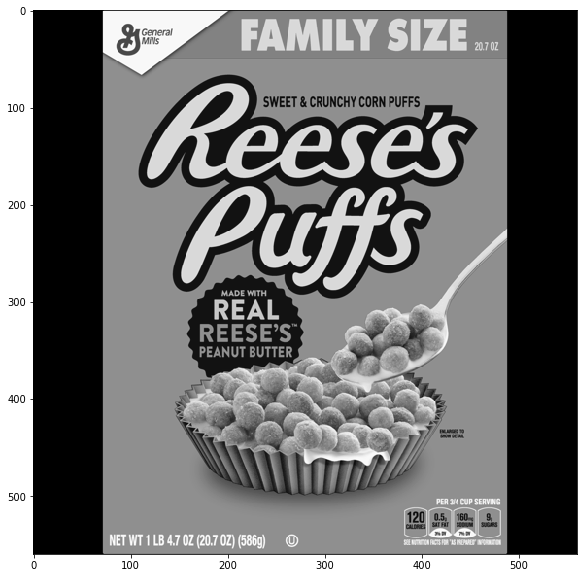

In [28]:
reeses = cv2.imread('../Images/reeses_puffs.png', 0)
display(reeses)

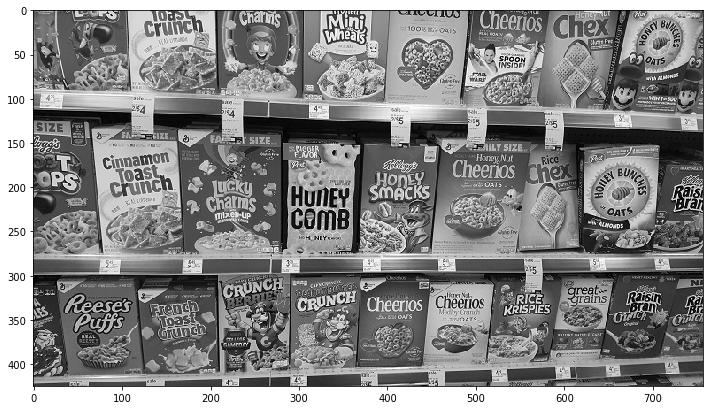

In [29]:
cereals = cv2.imread('../Images/many_cereals.jpg', 0)
display(cereals)

### Brut Force detection with orb

In [30]:
orb = cv2.ORB_create()

In [31]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [32]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [33]:
matches = bf.match(des1, des2)

In [34]:
single_match = matches[0]
single_match.distance

78.0

In [35]:
matches = sorted(matches, key=lambda x:x.distance)

In [36]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

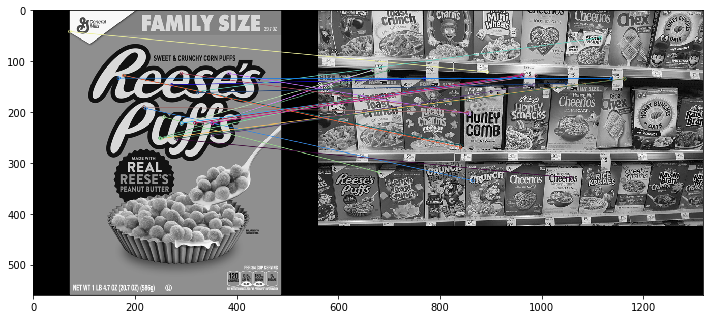

In [37]:
display(reeses_matches)

### SIFT descripter (Scale Invariant Feature Transform)

In [38]:
sift = cv2.xfeatures2d.SIFT_create()

In [47]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [48]:
bf = cv2.BFMatcher()

In [49]:
matches = bf.knnMatch(des1, des2, k=2)

In [50]:
matches

[[<DMatch 095DD050>, <DMatch 09424158>],
 [<DMatch 09424D40>, <DMatch 09424FB0>],
 [<DMatch 09424800>, <DMatch 094249B0>],
 [<DMatch 094249C8>, <DMatch 09424500>],
 [<DMatch 09424638>, <DMatch 09424980>],
 [<DMatch 09424D58>, <DMatch 09424488>],
 [<DMatch 09424860>, <DMatch 09424F98>],
 [<DMatch 09424170>, <DMatch 094241B8>],
 [<DMatch 09424B60>, <DMatch 09424620>],
 [<DMatch 094243B0>, <DMatch 09424F38>],
 [<DMatch 09424DD0>, <DMatch 09424710>],
 [<DMatch 09424140>, <DMatch 094245C0>],
 [<DMatch 094247D0>, <DMatch 09424470>],
 [<DMatch 09932680>, <DMatch 099326F8>],
 [<DMatch 09932740>, <DMatch 09932758>],
 [<DMatch 09932770>, <DMatch 09932788>],
 [<DMatch 099327E8>, <DMatch 09932860>],
 [<DMatch 09932890>, <DMatch 099326E0>],
 [<DMatch 099328C0>, <DMatch 09932968>],
 [<DMatch 09932728>, <DMatch 09932980>],
 [<DMatch 099329C8>, <DMatch 099329B0>],
 [<DMatch 09932920>, <DMatch 099328D8>],
 [<DMatch 099328A8>, <DMatch 099328F0>],
 [<DMatch 099327B8>, <DMatch 09932950>],
 [<DMatch 099327

In [51]:
good = []
# Less distance means a better match
# called as Ratio Test
# If match1 distance is less than 75% of match2 distance, then descriptor was a good match
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [52]:
good

[[<DMatch 09932E00>],
 [<DMatch 0983E1A0>],
 [<DMatch 0983E1D0>],
 [<DMatch 0983E350>],
 [<DMatch 0983E7D0>],
 [<DMatch 0983EA10>],
 [<DMatch 0983EB30>],
 [<DMatch 0983EDD0>],
 [<DMatch 0983EF80>],
 [<DMatch 0983F278>],
 [<DMatch 0983F338>],
 [<DMatch 09840140>],
 [<DMatch 09840170>],
 [<DMatch 09840230>],
 [<DMatch 09840C50>],
 [<DMatch 09841398>],
 [<DMatch 09841428>],
 [<DMatch 098414B8>],
 [<DMatch 09841B18>],
 [<DMatch 09841C08>],
 [<DMatch 098428F0>],
 [<DMatch 098429E0>],
 [<DMatch 09842A10>],
 [<DMatch 09842B60>],
 [<DMatch 09842B90>],
 [<DMatch 09843938>],
 [<DMatch 09843A58>],
 [<DMatch 09843A88>],
 [<DMatch 09843ED8>],
 [<DMatch 09843F98>],
 [<DMatch 09844050>],
 [<DMatch 098444A0>],
 [<DMatch 09844740>],
 [<DMatch 098447D0>],
 [<DMatch 09844B90>],
 [<DMatch 09844D70>],
 [<DMatch 098453F8>],
 [<DMatch 09845488>],
 [<DMatch 098AA0B0>],
 [<DMatch 098AA0E0>],
 [<DMatch 098AA950>],
 [<DMatch 098AAB60>],
 [<DMatch 098AAC50>],
 [<DMatch 098AACE0>],
 [<DMatch 098AAD10>],
 [<DMatch 

In [53]:
len(good)

78

In [54]:
len(matches)

1503

In [55]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

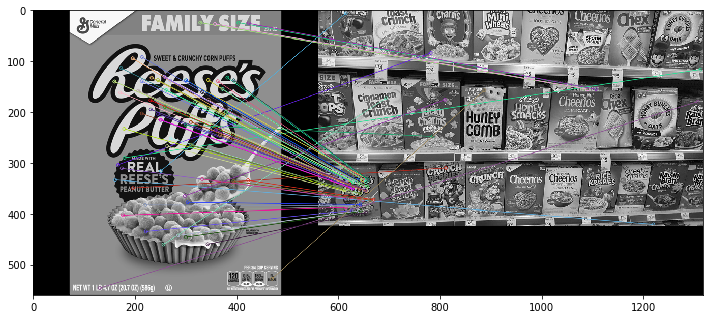

In [56]:
display(sift_matches)

# FLANN (Fast Library for Approximate Nearst Neighbours)

In [75]:
sift = cv2.xfeatures2d.SIFT_create()

In [76]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [77]:
# FLANN is faster than broke force method
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [78]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [79]:
matches = flann.knnMatch(des1, des2, k=2)

In [80]:
matchesMask = [[0,0] for i in range(len(matches))]

In [83]:

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1, 0]

In [90]:
draw_params = dict(matchColor=(0, 0, 255),
                  singlePointColor=(255, 0, 0),
                  matchesMask=matchesMask,
                  flags=0)

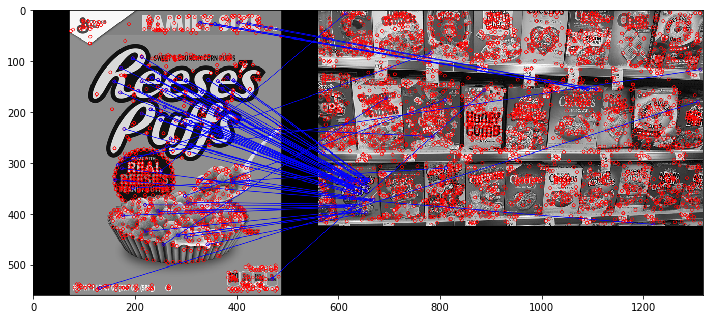

In [91]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)